In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
folders = ['LoRA', 'pre-trained', 'fine-tune']
metrics = {
    'BERT_F1': 'bert_score_results.csv',
    'BLEU': 'bleu_score_results.csv',
    'DeepEval_Correctness': 'final_eval_results.xlsx'
}

# Map metric names to their actual column headers in the files
col_name_map = {
    'BERT_F1': 'BERT_F1',
    'BLEU': 'BLEU_Score',
    'DeepEval_Correctness': 'DeepEval_Correctness'
}

# Load and organize all data
data = {}
for folder in folders:
    data[folder] = {}
    for metric_name, filename in metrics.items():
        path = f'{folder}/{filename}'
        if filename.endswith('.csv'):
            df = pd.read_csv(path)
        else:
            df = pd.read_excel(path)
        # Use mapped column names
        data[folder][metric_name] = df[col_name_map[metric_name]]

In [2]:
# Create summary table
summary_rows = []
for metric_name in metrics.keys():
    for folder in folders:
        scores = data[folder][metric_name]
        summary_rows.append({
            'Model': folder,
            'Metric': metric_name,
            'Mean': scores.mean(),
            'Median': scores.median(),
            'Std Dev': scores.std(),
            'Min': scores.min(),
            'Max': scores.max(),
            'Count': scores.count()
        })

summary_df = pd.DataFrame(summary_rows)
print("Summary Table:")
print(summary_df)

Summary Table:
         Model                Metric      Mean    Median   Std Dev       Min  \
0         LoRA               BERT_F1  0.842656  0.850063  0.036726  0.689564   
1  pre-trained               BERT_F1  0.833134  0.835821  0.025797  0.721316   
2    fine-tune               BERT_F1  0.926067  0.938693  0.052649  0.767082   
3         LoRA                  BLEU  0.046188  0.025577  0.063378  0.000000   
4  pre-trained                  BLEU  0.017699  0.010989  0.023695  0.000000   
5    fine-tune                  BLEU  0.417440  0.364183  0.316947  0.000000   
6         LoRA  DeepEval_Correctness  0.669664  0.722796  0.167892  0.000000   
7  pre-trained  DeepEval_Correctness  0.811413  0.821760  0.111223  0.212328   
8    fine-tune  DeepEval_Correctness  0.722506  0.757216  0.118076  0.341042   

        Max  Count  
0  0.935142    150  
1  0.908383    150  
2  1.000000    150  
3  0.455267    150  
4  0.179891    150  
5  1.000000    150  
6  0.944395    150  
7  1.000000    1

## Summary Table Interpretation: LoRA vs. Pre-trained vs. Fine-tune

| Metric                | Model        | Mean     | Median   | Std Dev | Notes                                                                 |
|-----------------------|--------------|----------|----------|---------|-----------------------------------------------------------------------|
| **BERT_F1**           | LoRA         | 0.8427   | 0.8501   | 0.0367  | Good improvement over pre-trained. Solid semantic alignment.          |
|                       | Pre-trained  | 0.8331   | 0.8358   | 0.0258  | Baseline model. Most stable, lower spread.                            |
|                       | Fine-tune    | 0.9261   | 0.9387   | 0.0526  | Dramatic improvement — fine-tuning resulted in significantly higher semantic accuracy. |
| **BLEU**              | LoRA         | 0.0462   | 0.0256   | 0.0634  | Small boost over pre-trained. Low BLEU overall, indicating free-form nature. |
|                       | Pre-trained  | 0.0177   | 0.0110   | 0.0237  | Very low BLEU, confirming that n-gram overlap is weak.                |
|                       | Fine-tune    | 0.4174   | 0.3642   | 0.3170  | Massive jump in BLEU. Suggests fine-tuning led to closer phrasing to reference answers. |
| **DeepEval_Correctness** | LoRA      | 0.6700   | 0.7228   | 0.1679  | Still the weakest performer. LoRA harms correctness and increases variability. |
|                       | Pre-trained  | 0.8114   | 0.8218   | 0.1112  | Best overall factual accuracy. Stable and high median.                |
|                       | Fine-tune    | 0.7225   | 0.7572   | 0.1181  | Better than LoRA, but still worse than base model. Factual gains exist but not maximized. |

---

## Insights from Summary

### What Improved with Fine-tune:
- **BERT F1 jumped significantly**: from 0.8427 (LoRA) → 0.9261 (fine-tune)
- **BLEU soared**: from 0.0462 (LoRA) → 0.4174 (fine-tune)  
  → Indicates the model now uses **closer wording** to the official answer.

### What Got Worse with LoRA:
- **DeepEval Correctness dropped heavily** (0.8114 → 0.6697)
- Indicates LoRA likely over-optimized surface-level alignment at the expense of factuality.

### Mixed with Fine-tune:
- **DeepEval_Correctness = 0.7225**  
  Better than LoRA, but still doesn’t outperform the pre-trained base.  
  Suggests that fine-tuning helps, but the model **hasn’t fully recovered factual grounding**.

---

## Interpretation

- **LoRA** improves semantic matching (BERT F1), but harms correctness, likely due to overfitting on phrasing patterns.
- **Pre-trained** is the most factually stable model — high correctness and low variance, but it lags in semantic matching and fluency.
- **Fine-tuning offers the best semantic and lexical overlap** (BERT F1 & BLEU), but still hasn’t fully recaptured factual reliability. It offers a **strong balance**, though.

> **Takeaway**  
> - **LoRA**: "Better wording, weaker truth."  
> - **Fine-tune**: "Better wording, better BLEU, still room to grow in correctness."  
> - **Pre-trained**: "Most honest, but less eloquent."



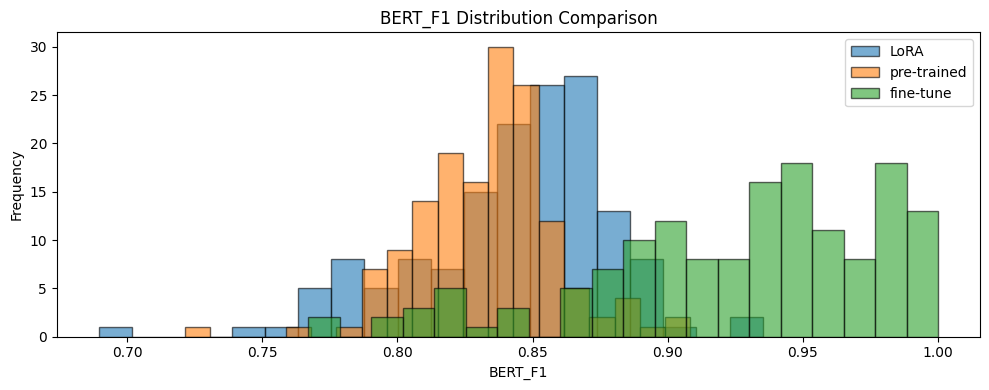

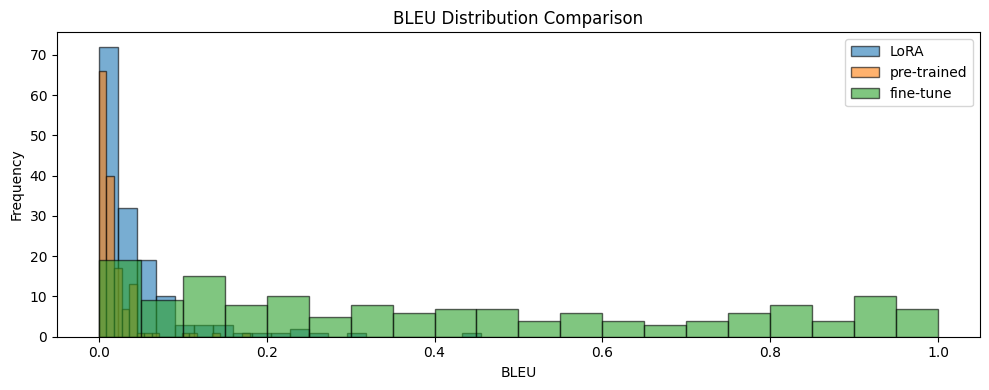

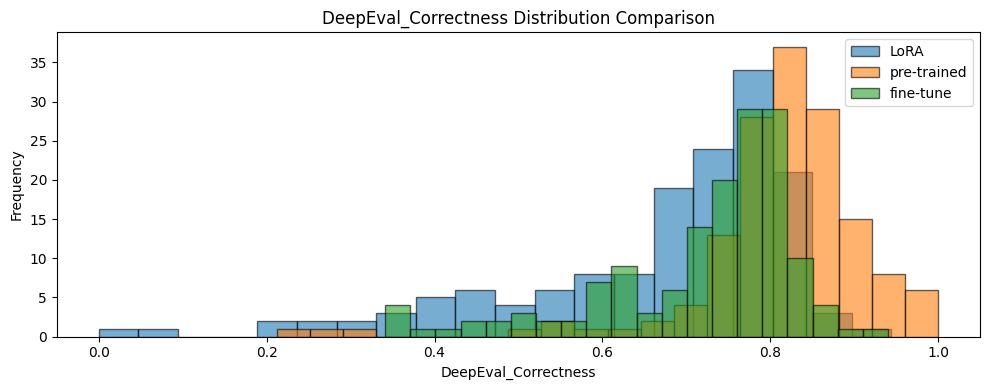

In [3]:
# Plot histograms
for metric_name in metrics.keys():
    plt.figure(figsize=(10, 4))
    for folder in folders:
        plt.hist(data[folder][metric_name], bins=20, alpha=0.6, label=folder, edgecolor='black')
    plt.title(f'{metric_name} Distribution Comparison')
    plt.xlabel(metric_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Histogram Interpretation: LoRA vs. Pre-trained vs. Fine-tune

---

### BERT_F1 Distribution

- The pre-trained model shows a compact distribution centered around 0.83–0.85, indicating semantic consistency but limited strength.
- LoRA shifts the distribution slightly to the right, with more samples in the 0.85–0.87 range, showing modest improvement in semantic alignment.
- Fine-tune clearly dominates: its distribution stretches strongly into the 0.90–1.00 range, with a visible concentration above 0.93.
- However, fine-tune also introduces more variance compared to pre-trained.

**Interpretation**: Fine-tuning substantially improves semantic similarity (BERT F1) over both LoRA and the base model, though at the cost of greater variability.

---

### BLEU Distribution

- The BLEU scores for pre-trained and LoRA are both heavily skewed toward zero. Most responses have almost no n-gram overlap with references.
- LoRA slightly expands the tail of BLEU scores, but still remains low.
- Fine-tune drastically changes the landscape — its BLEU distribution is wide and relatively even, spanning from 0.1 to 1.0.
- This suggests much higher surface-level similarity, possibly due to exposure to structured phrasing during fine-tuning.

**Interpretation**: Fine-tune significantly boosts BLEU scores, indicating closer surface-level matches. Pre-trained and LoRA responses are more free-form and loosely phrased.

---

### DeepEval_Correctness Distribution

- The pre-trained model exhibits the most desirable distribution: tight and concentrated around 0.8–0.9 with minimal outliers.
- LoRA’s distribution is spread out, with a long left tail including values as low as 0.0, suggesting inconsistency and factual degradation.
- Fine-tune improves over LoRA by shifting its peak rightward, centering around 0.75–0.85, but still does not match the stability of the pre-trained model.
- Fine-tune also retains some low-performing outliers, though fewer than LoRA.

**Interpretation**: The pre-trained model is still the most factually consistent. Fine-tune strikes a better balance than LoRA but hasn’t fully restored factual reliability.

---

### Overall Takeaways

- **Fine-tune** achieves the strongest performance in terms of semantic match (BERT F1) and n-gram alignment (BLEU), but still lags behind the base model in factual/logical correctness.
- **LoRA** improves semantic alignment slightly but suffers significantly in correctness.
- **Pre-trained** maintains high correctness, with limited stylistic or semantic tuning.

This highlights the classic trade-off between **fluency and factuality**, and suggests that fine-tuning should be paired with factual control mechanisms to reach optimal performance.



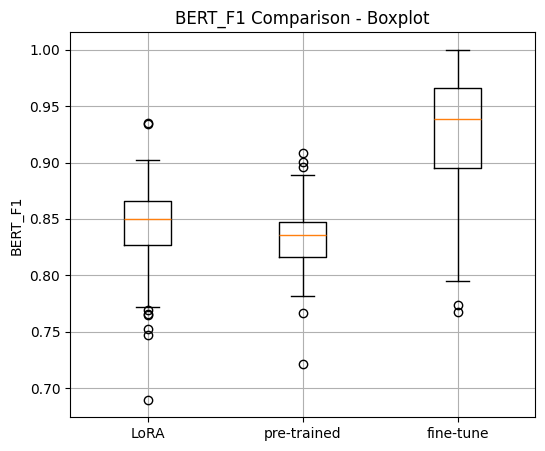

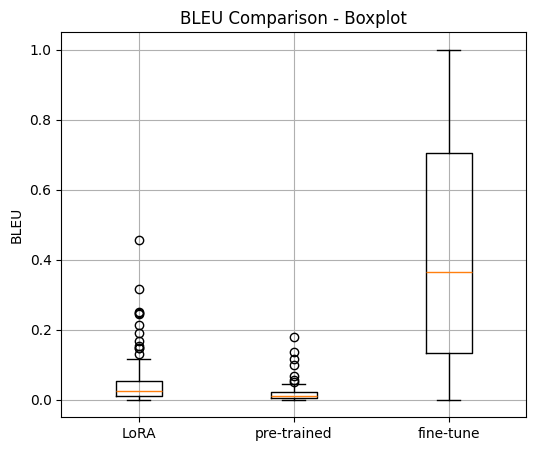

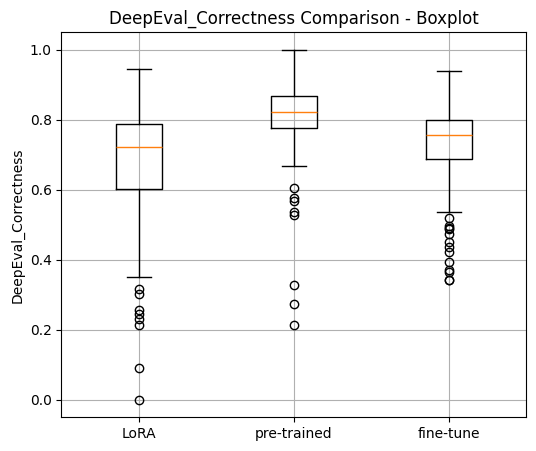

In [6]:
# Plot boxplots for all three metrics
for metric_name in metrics.keys():
    plt.figure(figsize=(6, 5))
    plt.boxplot(
        [data[folder][metric_name] for folder in folders],
        labels=folders

    )
    plt.title(f'{metric_name} Comparison - Boxplot')
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.show()

### Boxplot Interpretation: LoRA vs. Pre-trained vs. Fine-tune

---

### BERT_F1 Comparison

- **Fine-tune** has the highest median and widest upper range, with scores tightly packed in the 0.93–1.00 range. This demonstrates strong and consistent semantic alignment.
- **LoRA** performs better than pre-trained, with a higher median and more spread in the upper range. However, it includes more low-end outliers.
- **Pre-trained** has the lowest median and tightest spread, indicating reliable but lower semantic alignment.

**Interpretation**: Fine-tuning significantly enhances semantic match quality. LoRA brings moderate gains over pre-trained but introduces more variability.

---

### BLEU Comparison

- **Pre-trained** and **LoRA** both exhibit very low BLEU scores, clustered near zero. LoRA shows a slight lift, but it's minimal.
- **Fine-tune** stands out with a much higher BLEU median and a wide IQR spanning up to 1.0. This indicates improved lexical overlap with reference answers.

**Interpretation**: Fine-tuning clearly improves n-gram level similarity, suggesting that it guides the model toward more structured or reference-like phrasing. BLEU remains a weak signal for LoRA or pre-trained due to the generative nature of the task.

---

### DeepEval_Correctness Comparison

- **Pre-trained** retains the highest median and tightest upper quartile range, highlighting strong and consistent factual correctness.
- **LoRA** suffers the most, with the lowest median and many low-end outliers, including values near zero.
- **Fine-tune** improves over LoRA in both median and spread but still does not match the reliability of the pre-trained model. Several low-end outliers remain.

**Interpretation**: Pre-trained is still the most factually accurate. Fine-tune finds a better balance than LoRA, but factual correctness still suffers relative to the base model.

---

## Summary of Boxplot Insights

- **Fine-tune** excels in semantic similarity (BERT F1) and lexical matching (BLEU), but introduces some factual instability.
- **LoRA** improves semantic match modestly but significantly degrades correctness.
- **Pre-trained** is the most factual and stable, but trails in fluency and similarity metrics.

This highlights a key trade-off in model tuning:
> Optimizing for similarity and style can risk factual reliability unless counterbalanced by factual supervision or constraints.